In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])

#spec = Spectrum(glob.glob("*M2166spec.fits")[0],backFile=glob.glob("*spec_bkg.fits")[0],respFile=glob.glob("*.rmf")[0],arfFile=glob.glob("*.arf")[0])


***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0886090501_M2166grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.349e-03 +/- 6.529e-04 (65.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.295e+04 sec
 Using fit statistic: chi
 Using Background File                0886090501_M2166spec_bkg.fits
  Background Exposure Time: 1.295e+04 sec
 Using Response (RMF) File            0886090501_M2166spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886090501_M2166spec.arf



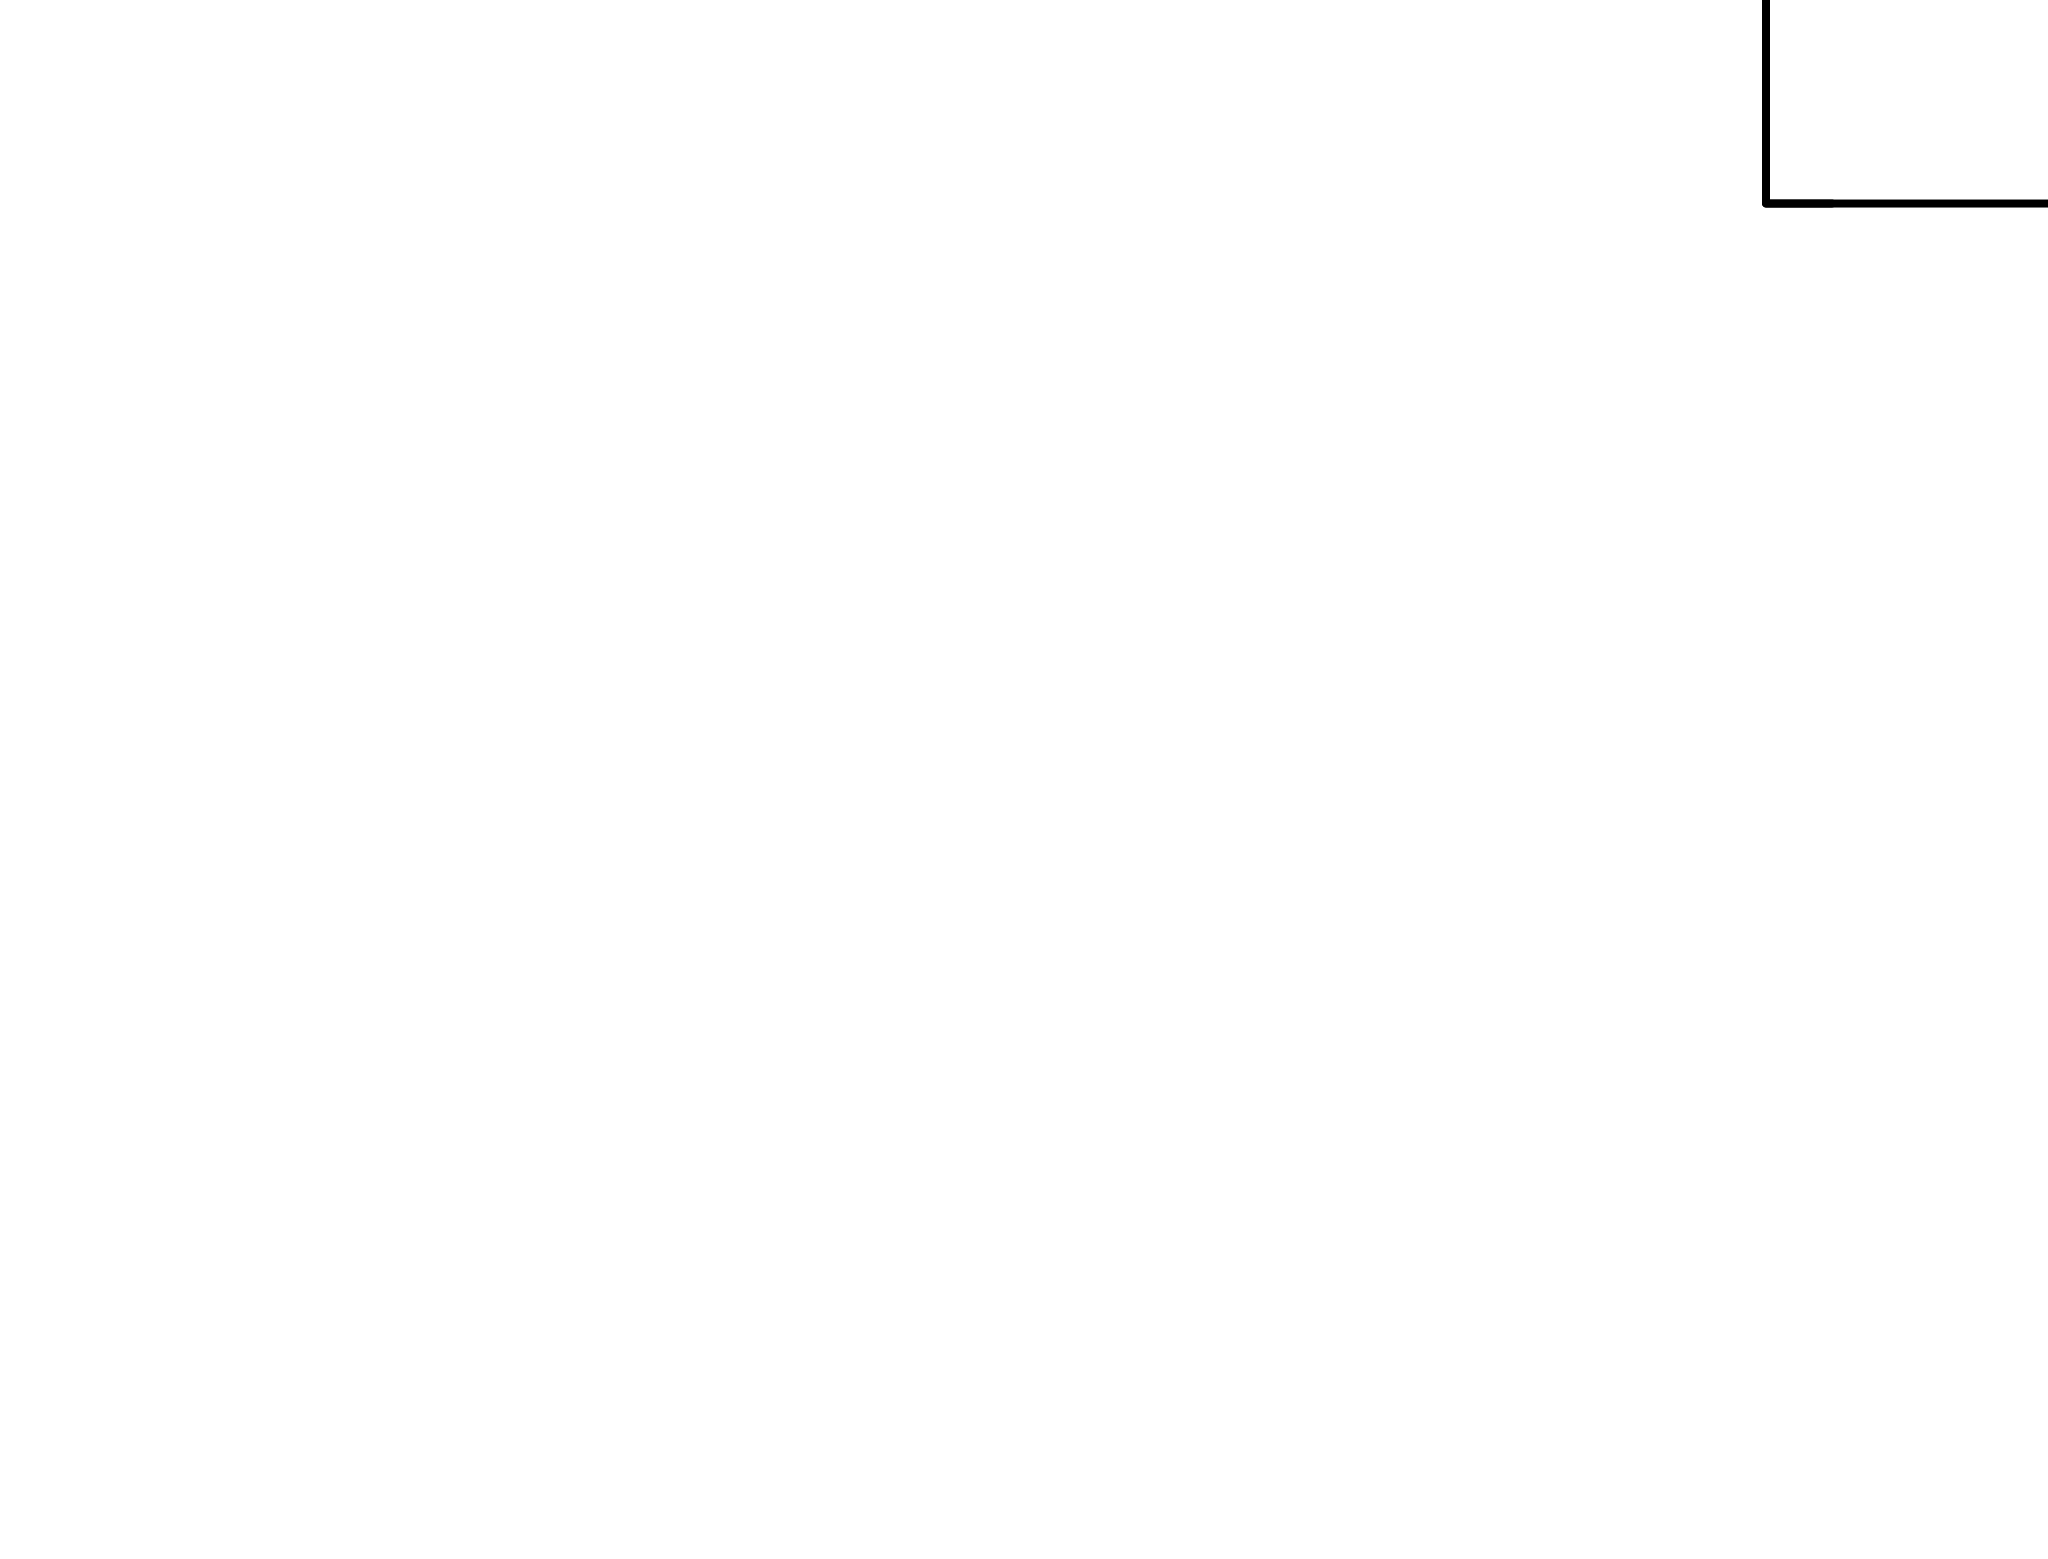

In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")

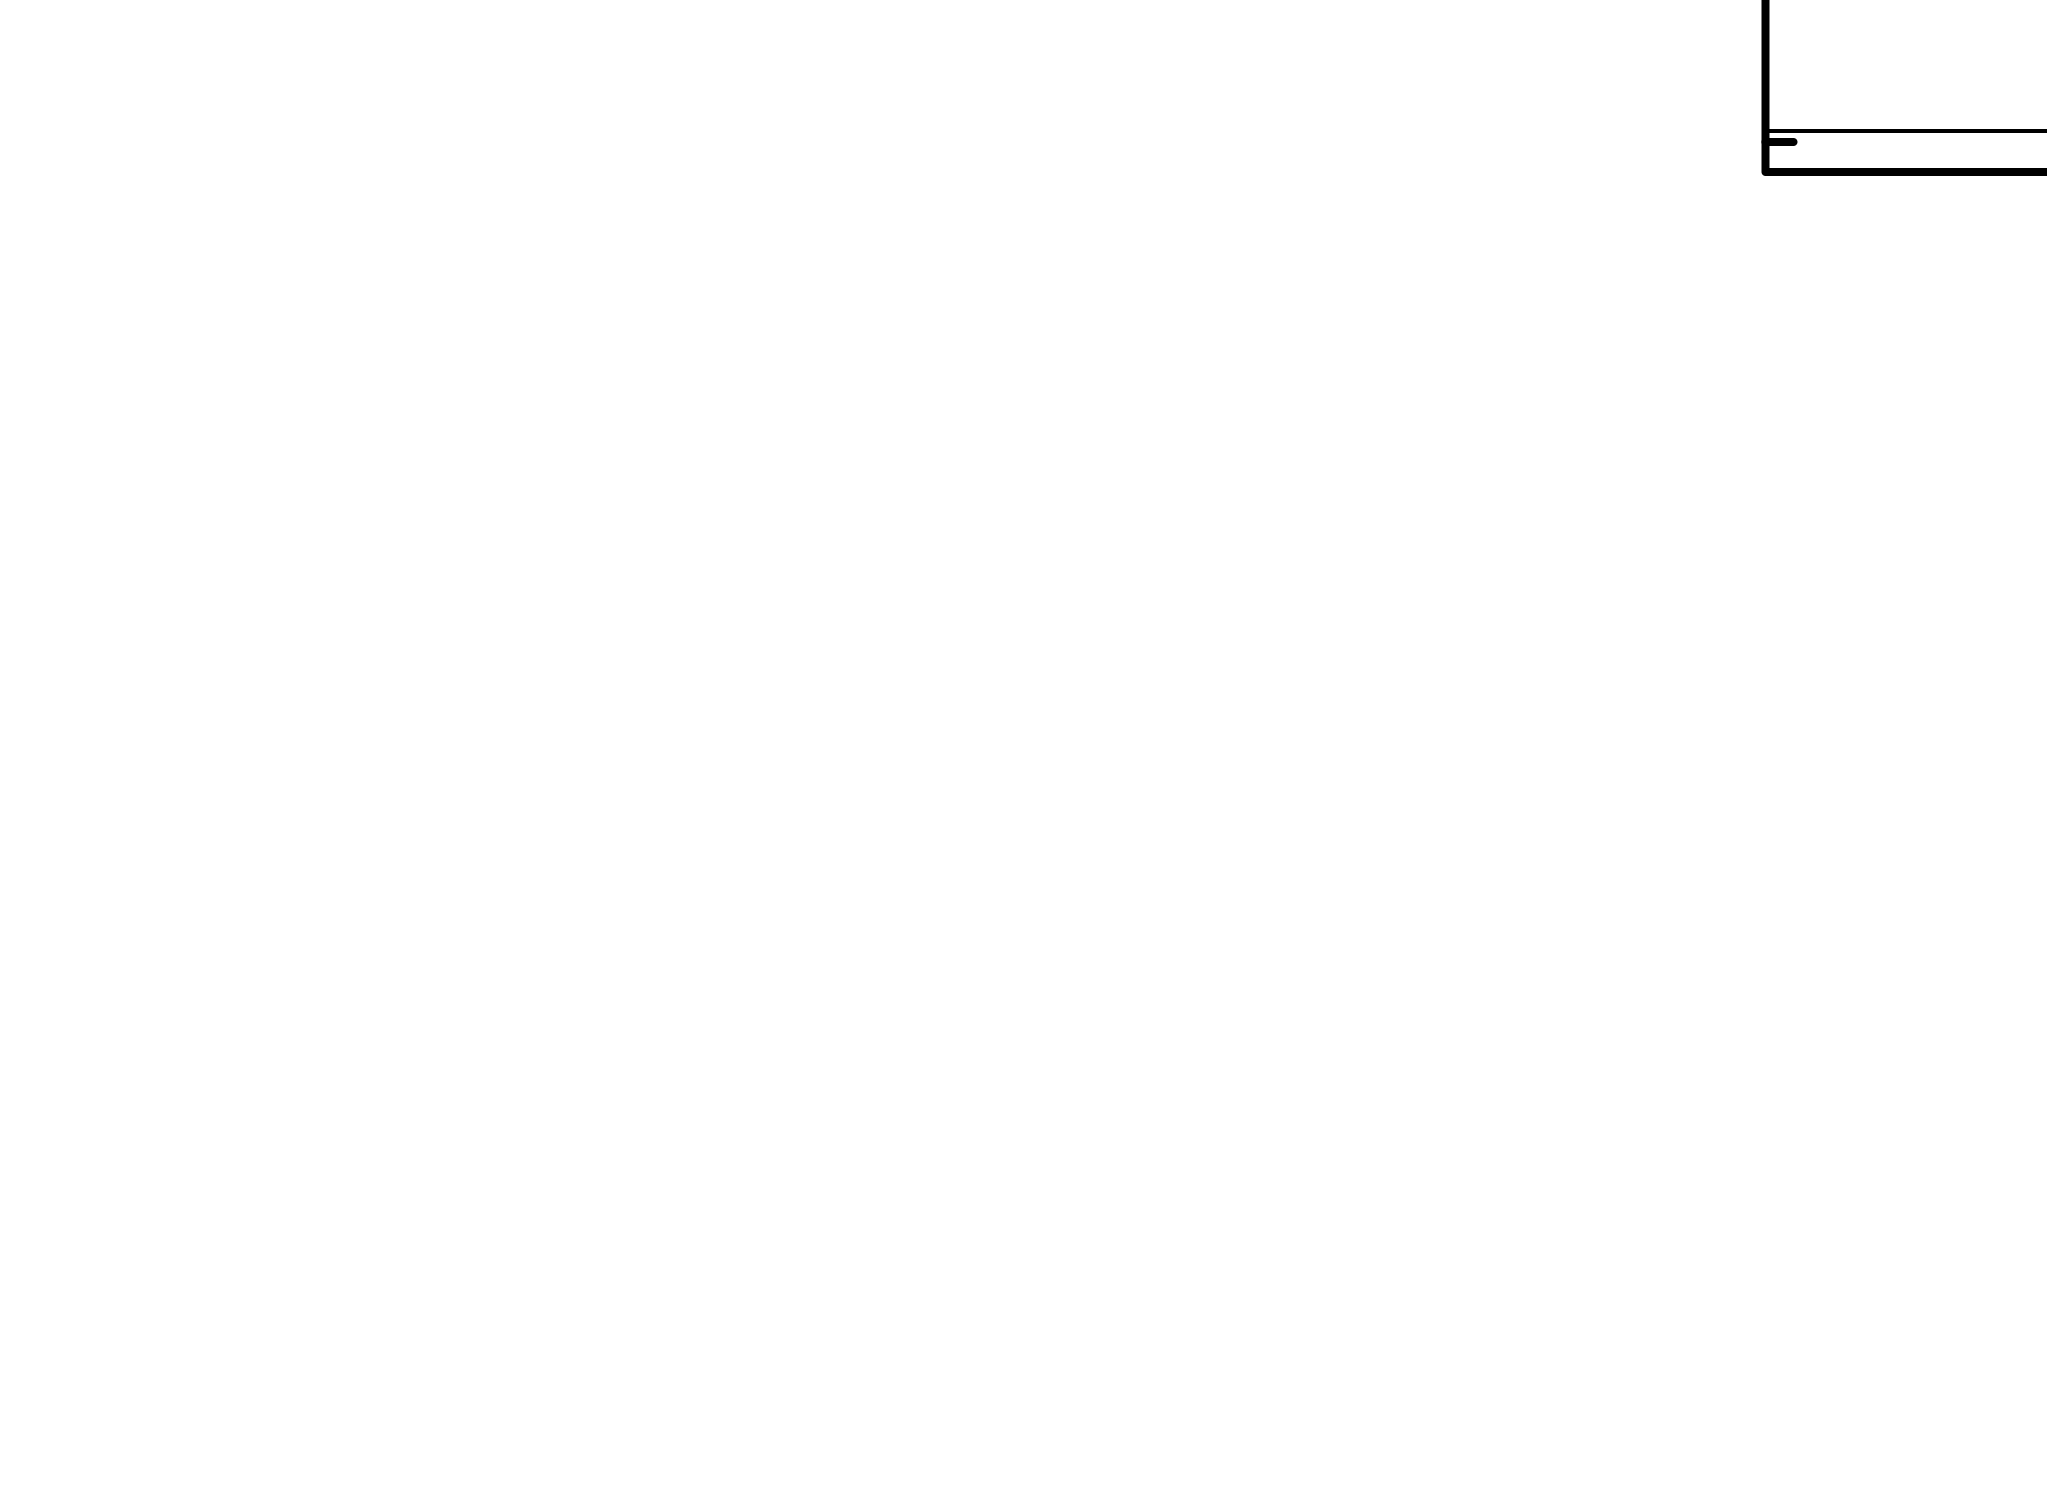

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

GammQ: A <=  0
GammQ: A <=  0


 Model Flux 3.1135e-05 photons (1.8445e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [4]:
spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")
AllModels.calcFlux("0.2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.780789e+10     using 3 bins.

Test statistic : Chi-Squared              5.780789e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
0.128756     0.293207     -2       1.08196       1.20179   2.64889e-05
0.0805928    8959.33      -2       1.31312       1.33014   3.25520e-05
0.0453984    6427.83      -2       1.48867       1.42921   3.83522e-05
0.0257863    3518.35     

GammQ: A <=  0
GammQ: A <=  0


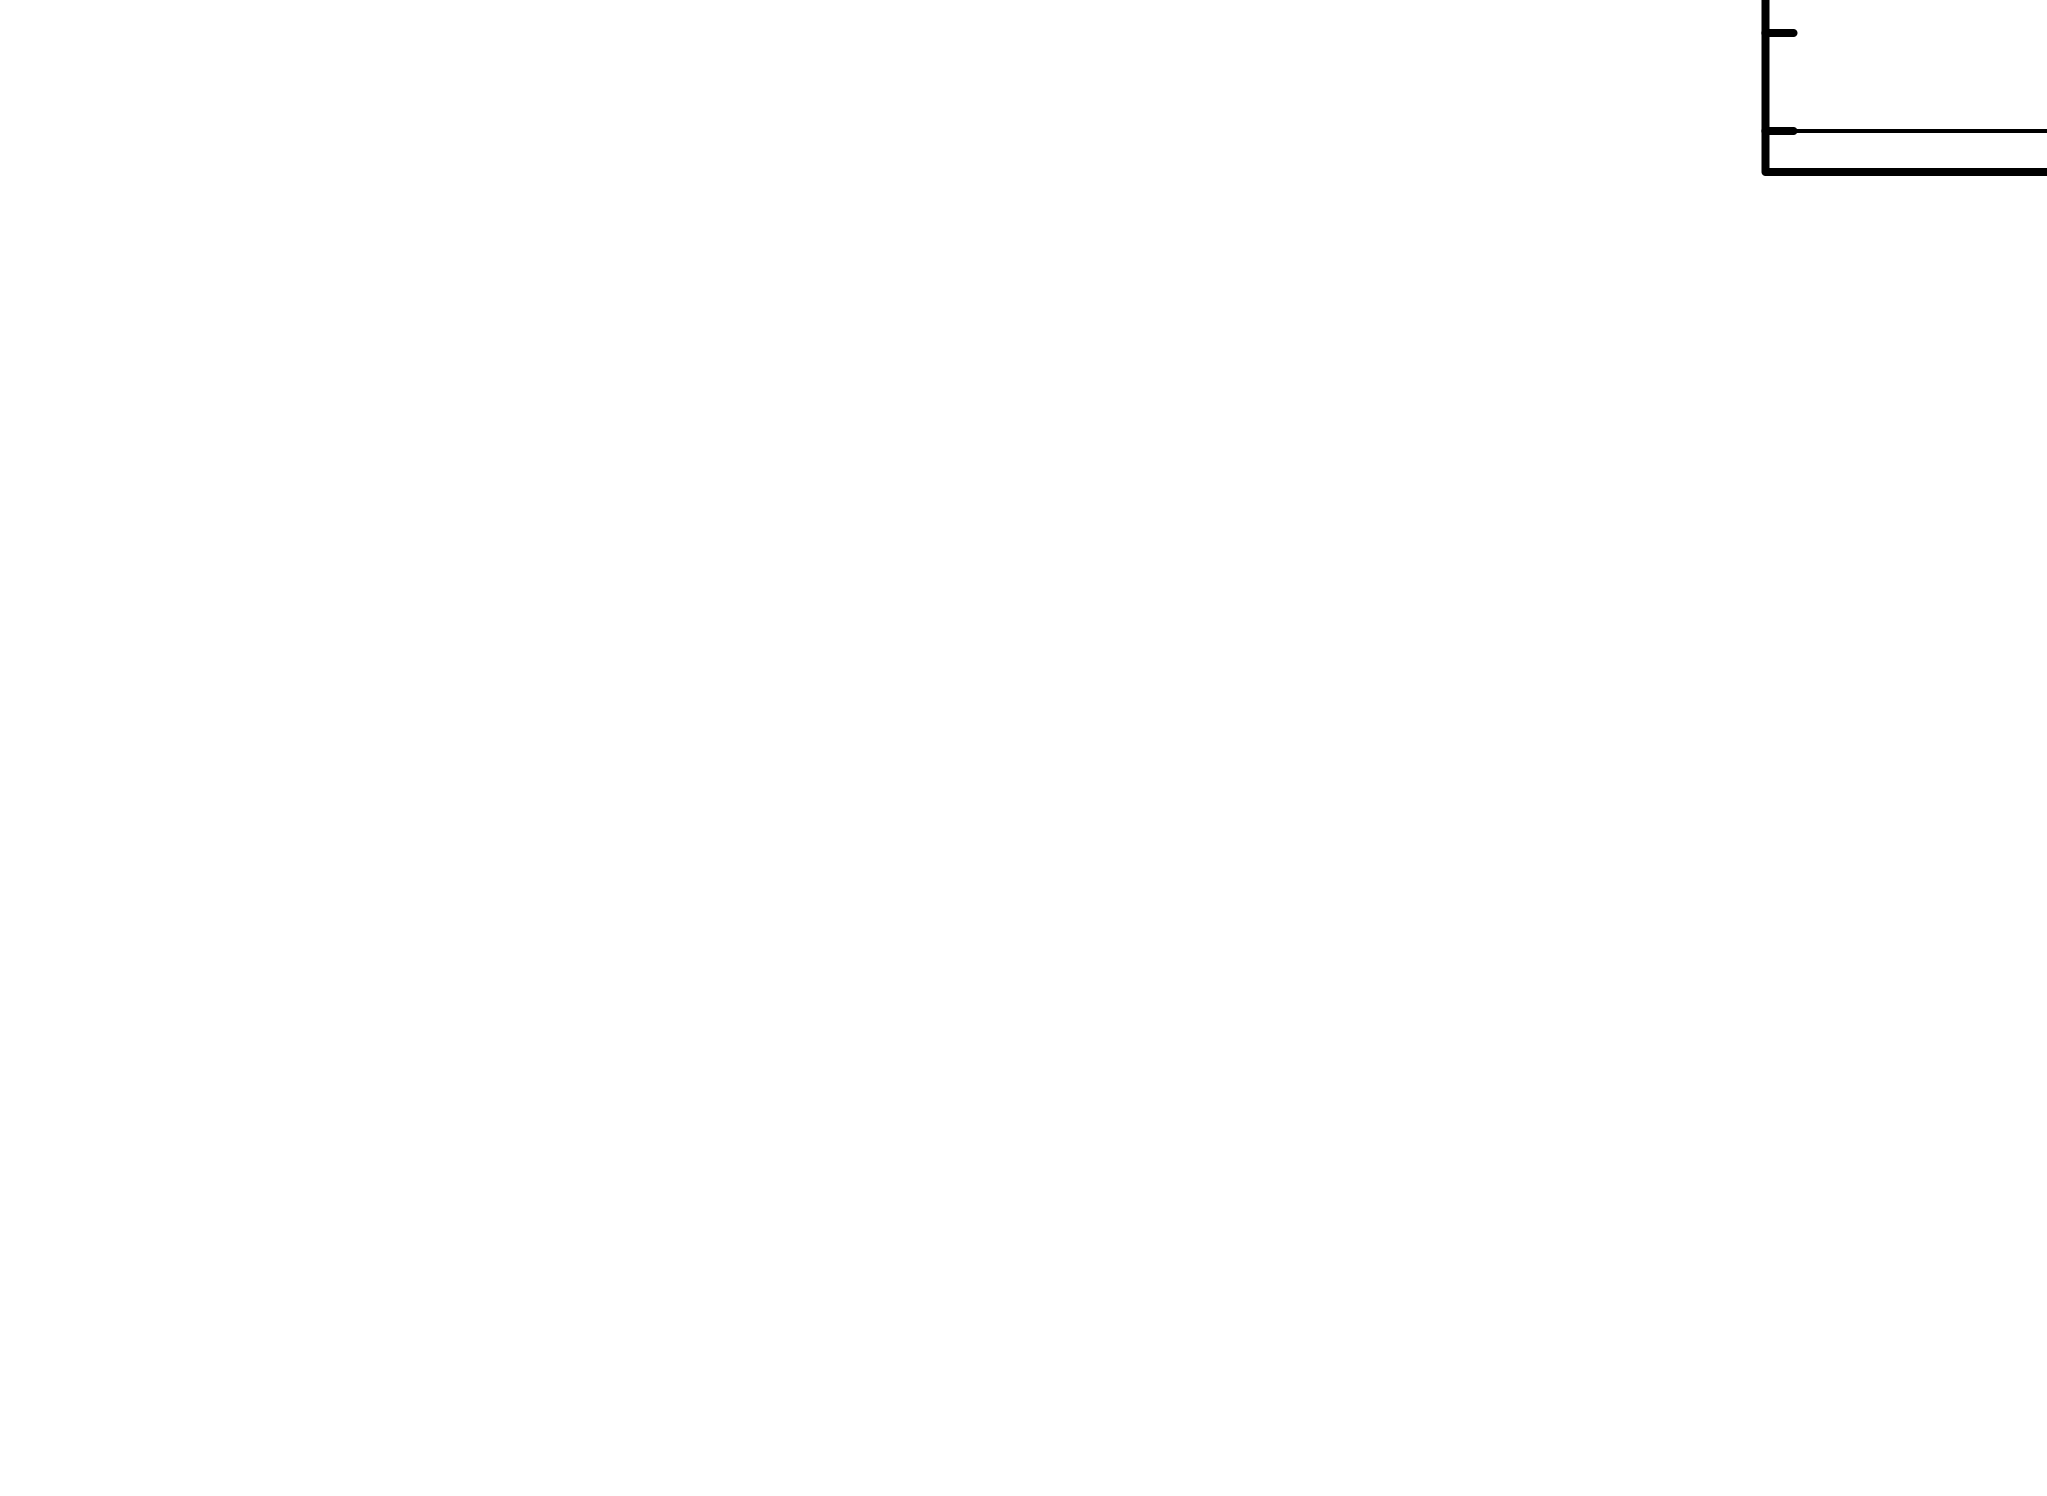

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

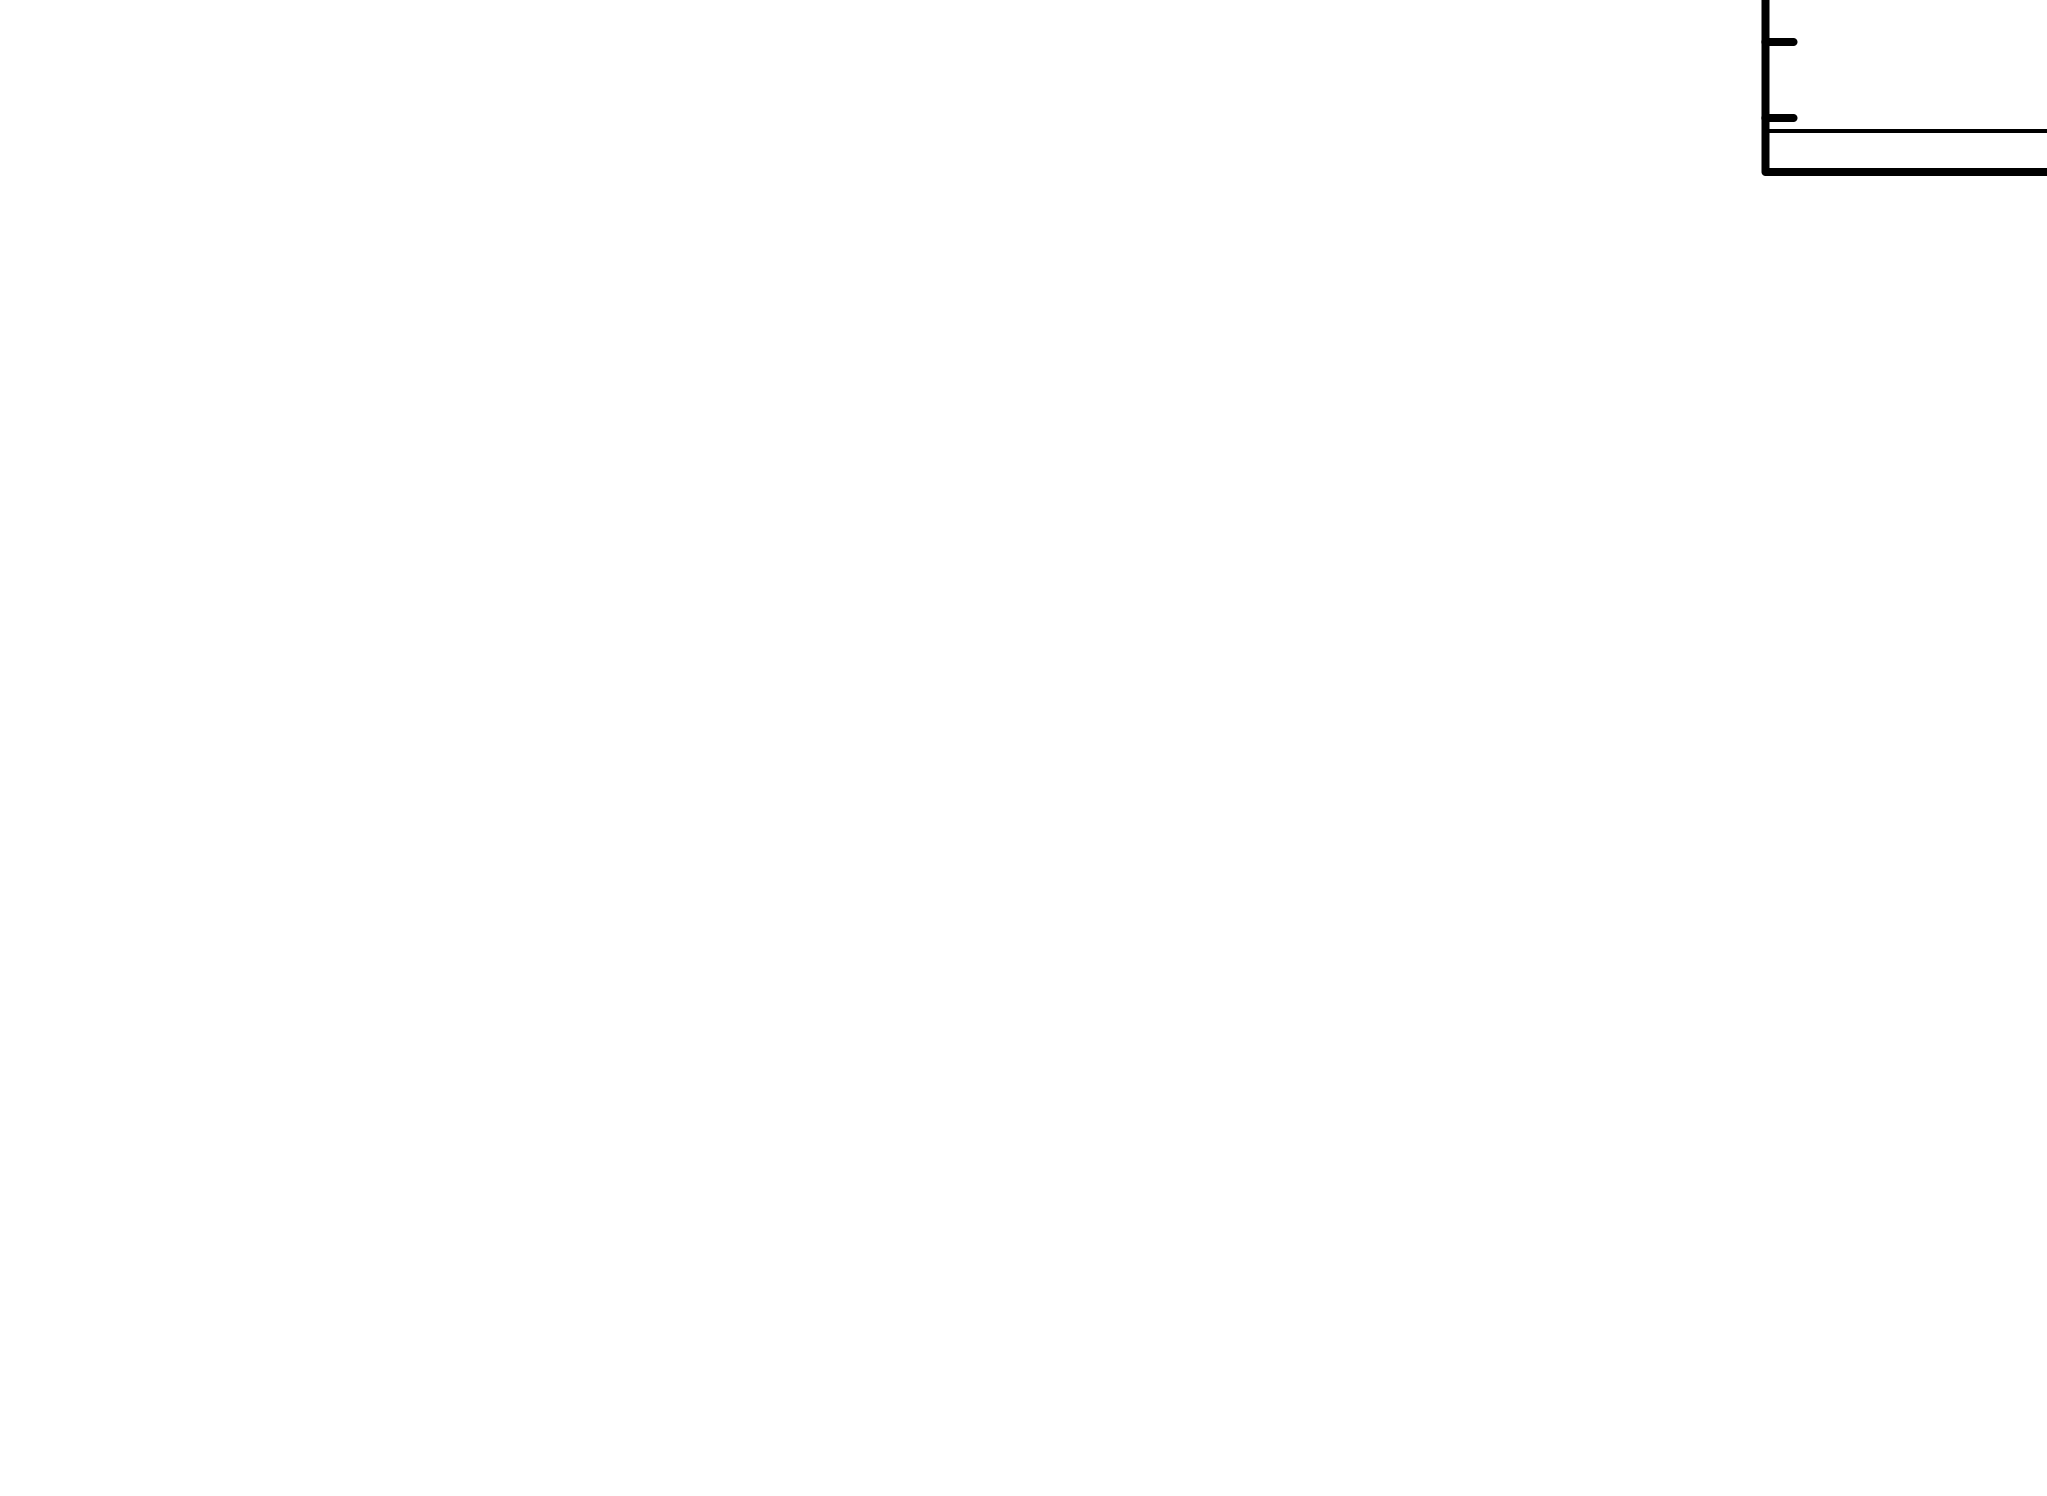


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.360141e+09     using 3 bins.

Test statistic : Chi-Squared              9.360141e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
0.0810842    0.442462     -3       1.63378       11.1132   5.76794e-05
0.000568133  6894.35      -4       1.81653       10.2101   6.36918e-05
2.52677e-10  633.346      -5       1.81340       

GammQ: A <=  0
GammQ: A <=  0


10.2494   6.39139e-05
6.61735e-15  0.246908     -6       1.81342       10.2494   6.39140e-05
 Variances and Principal Axes
                 1        2        3  
 1.5651E-10| -0.0000   0.0000   1.0000  
 9.0349E-01|  0.9984   0.0571   0.0000  
 1.6929E+03| -0.0571   0.9984  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   6.426e+00  -9.651e+01   1.666e-04
  -9.651e+01   1.687e+03  -2.663e-03
   1.666e-04  -2.663e-03   4.586e-09
------------------------------------

Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.81342      +/-  2.53500      
   2    2   bremss     kT         keV      10.2494      +/-  41.0782      
   3    2   bremss     norm                6.39140E-05  +/-  6.77215E-05  
________________________________________________________________________


Fit statistic  : Chi-Squared                   7e-15    

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.697543e+08     using 3 bins.

Test statistic : Chi-Squared              6.697543e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.


GammQ: A <=  0
GammQ: A <=  0


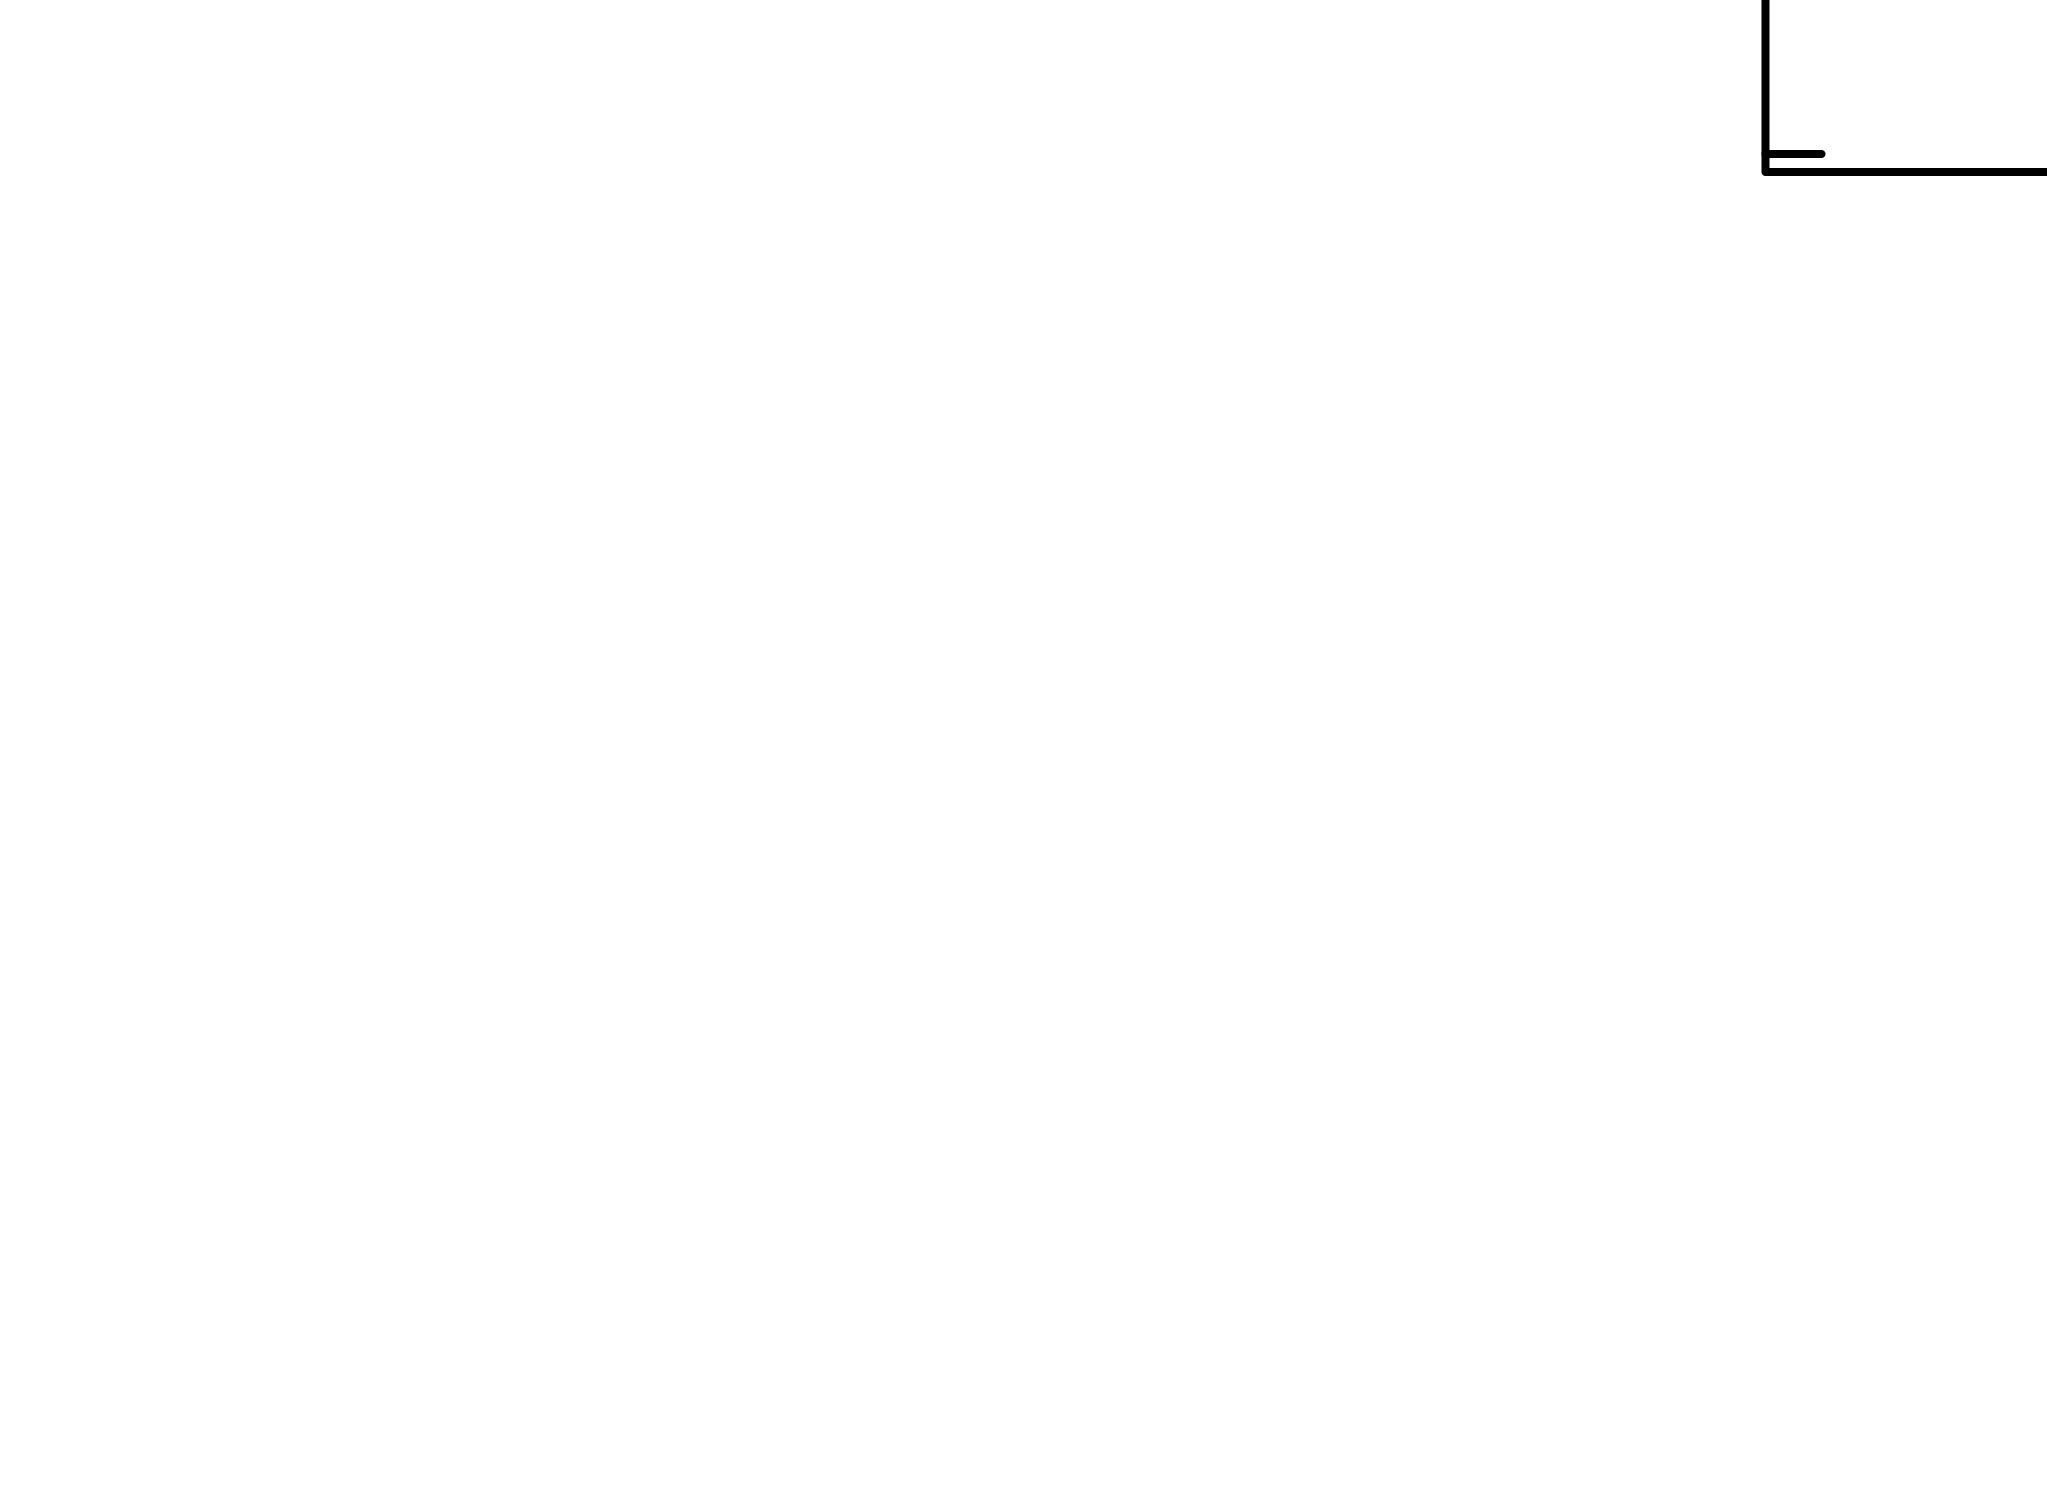

                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
10.2661      1.03226      -1       2.25370       2.10665   0.000113549
1.05607      16926.9      -2       1.10370       6.27417   0.000144859
0.0134928    1868.13      -3       1.74134       8.03882   0.000168426
0.00323908   279.407      -4       1.95081       6.59179   0.000181156
2.71512e-08  468.21       -5       1.94798       6.82071   0.000181863
1.15281e-18  1.14041      -6       1.94797       6.81990   0.000181862
 Variances and Principal Axes
                 1        2        5  
 1.2671E-09| -0.0000   0.0000   1.0000  
 8.9131E-01|  0.9936   0.1130   0.0000  
 4.7172E+02| -0.1130   0.9936  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   6.906e+00  -5.287e+01   5.332e-04
  -5.287e+01   4.657e+02  -4.340e-03
   5.332e-04  -4.340e-03   4.353e-08
------------------------------------

Model TBabs<1>*ap

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 3.3228e-05 photons (2.3417e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
#plx = 0.6016
d_kpc = 8
F_x = 2.3418*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.7927150255050755e+33


In [10]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.25351125850422


In [11]:
F_opt = 1.05*10**-5 * 10**(-0.4*21.05)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  3.9919886613658934e-14
F_x / F_opt:  0.7683605025949543



Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.406775e+08     using 3 bins.

Test statistic : Chi-Squared              6.406775e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.684870e+08     using 3 bins.

Test statistic : Chi-Squared              1.684870e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet

GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


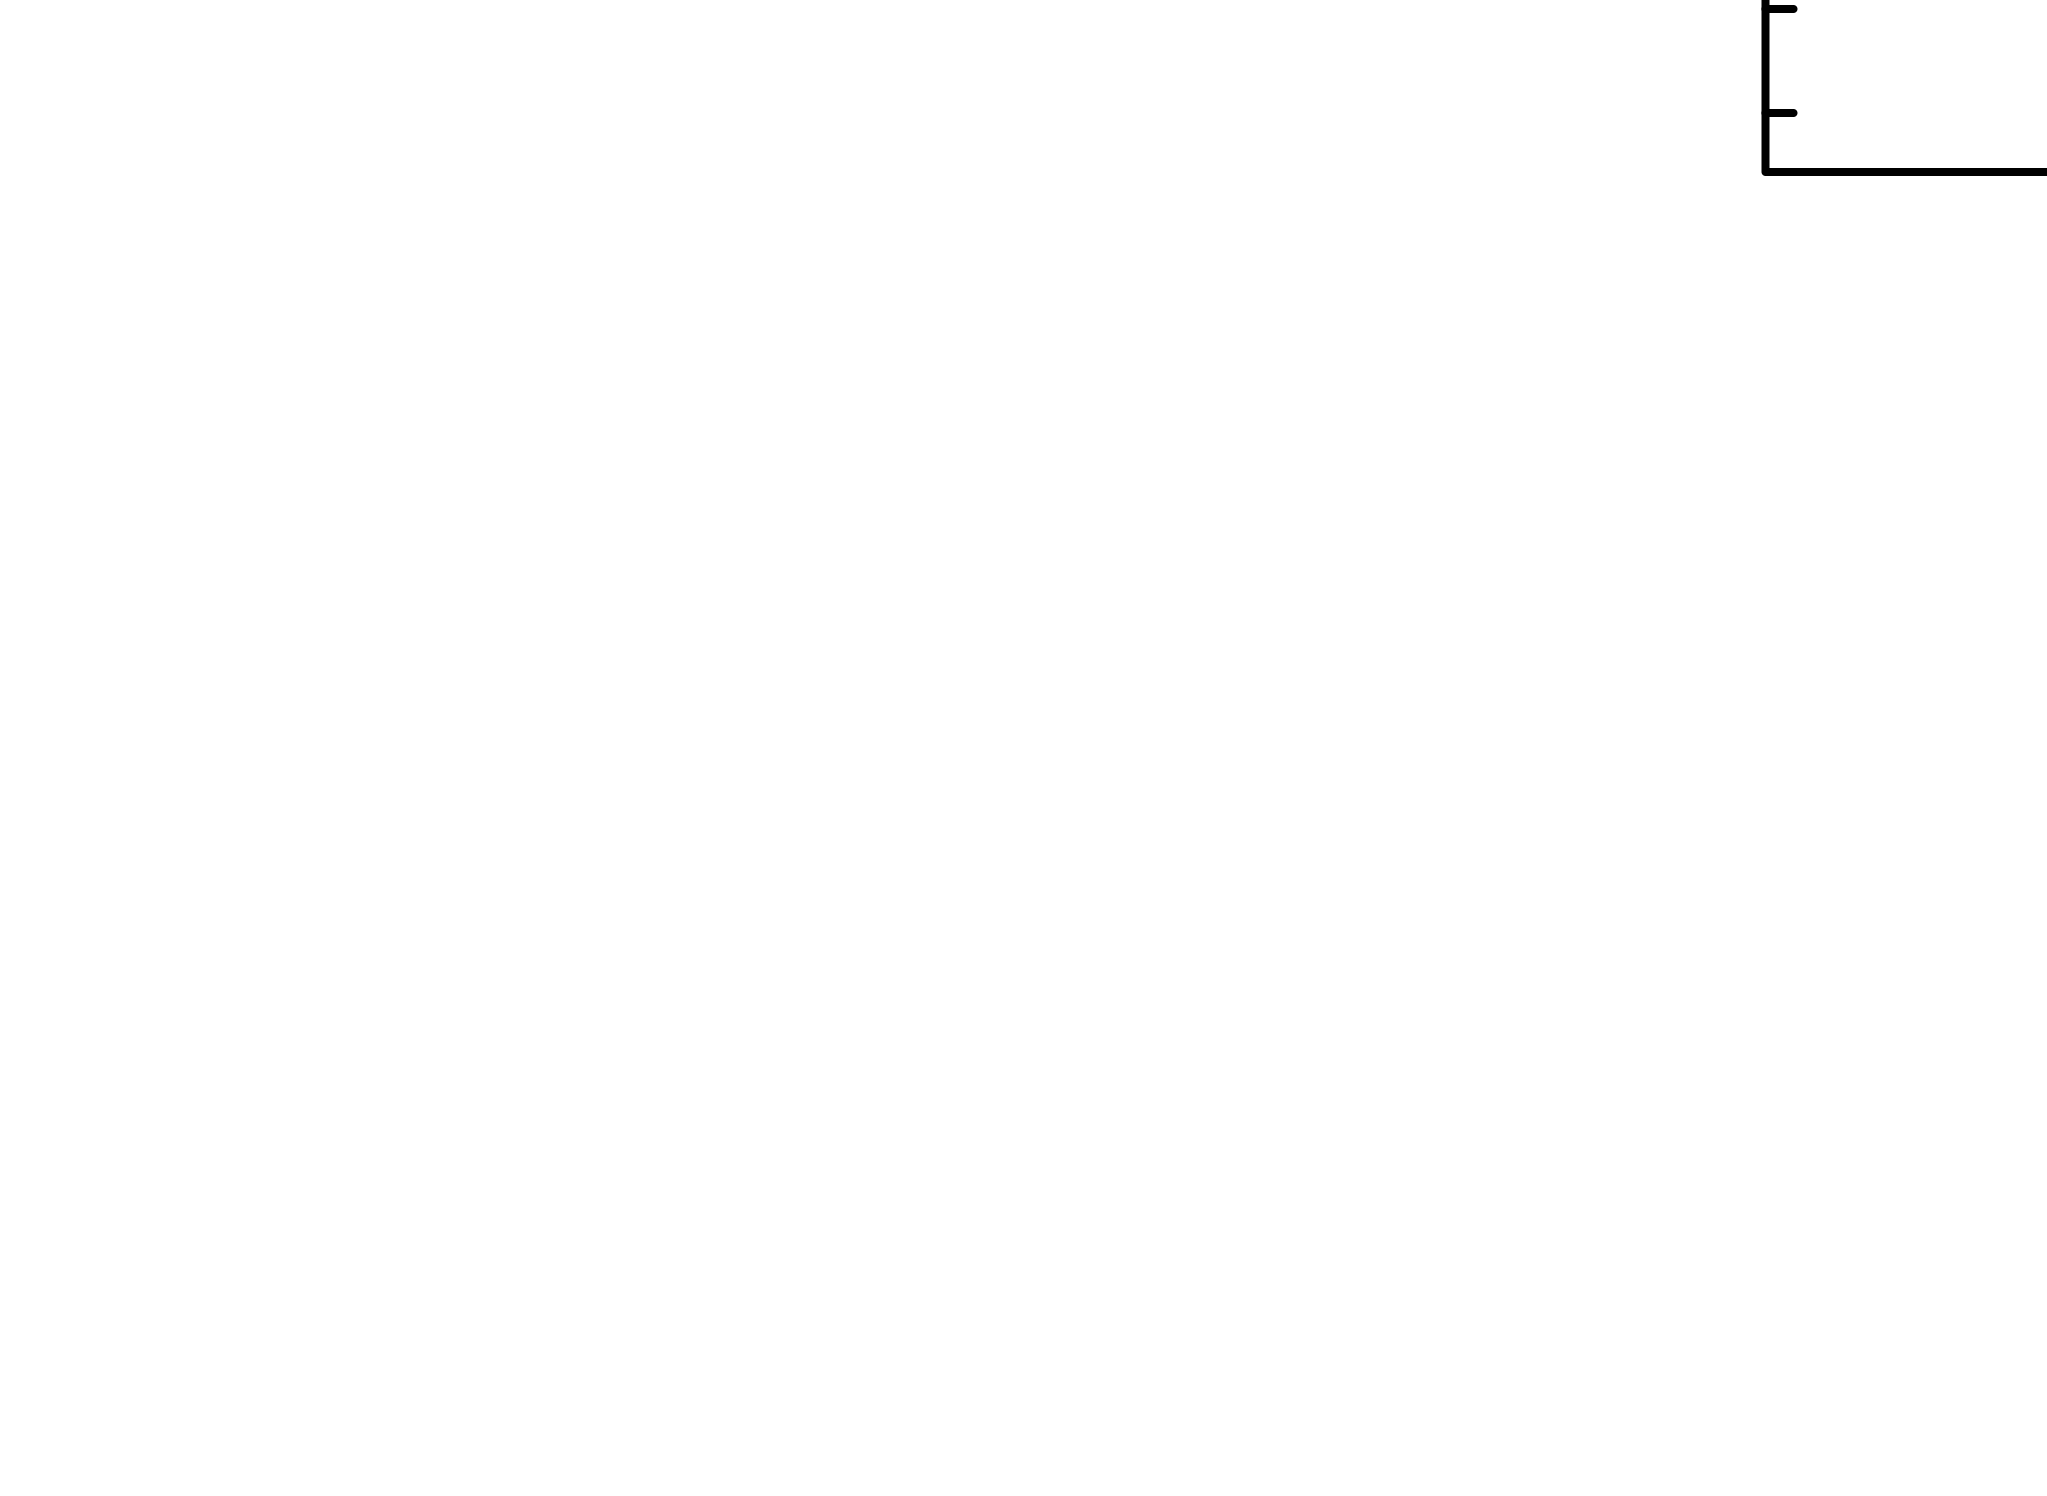

In [12]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc=0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.697543e+08     using 3 bins.

Test statistic : Chi-Squared              6.697543e+08     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.768819e+08     using 3 bins.

Test statistic : Chi-Squared              1.768819e+08     using 3 bins.
 Cannot calculate null hypothesis pr

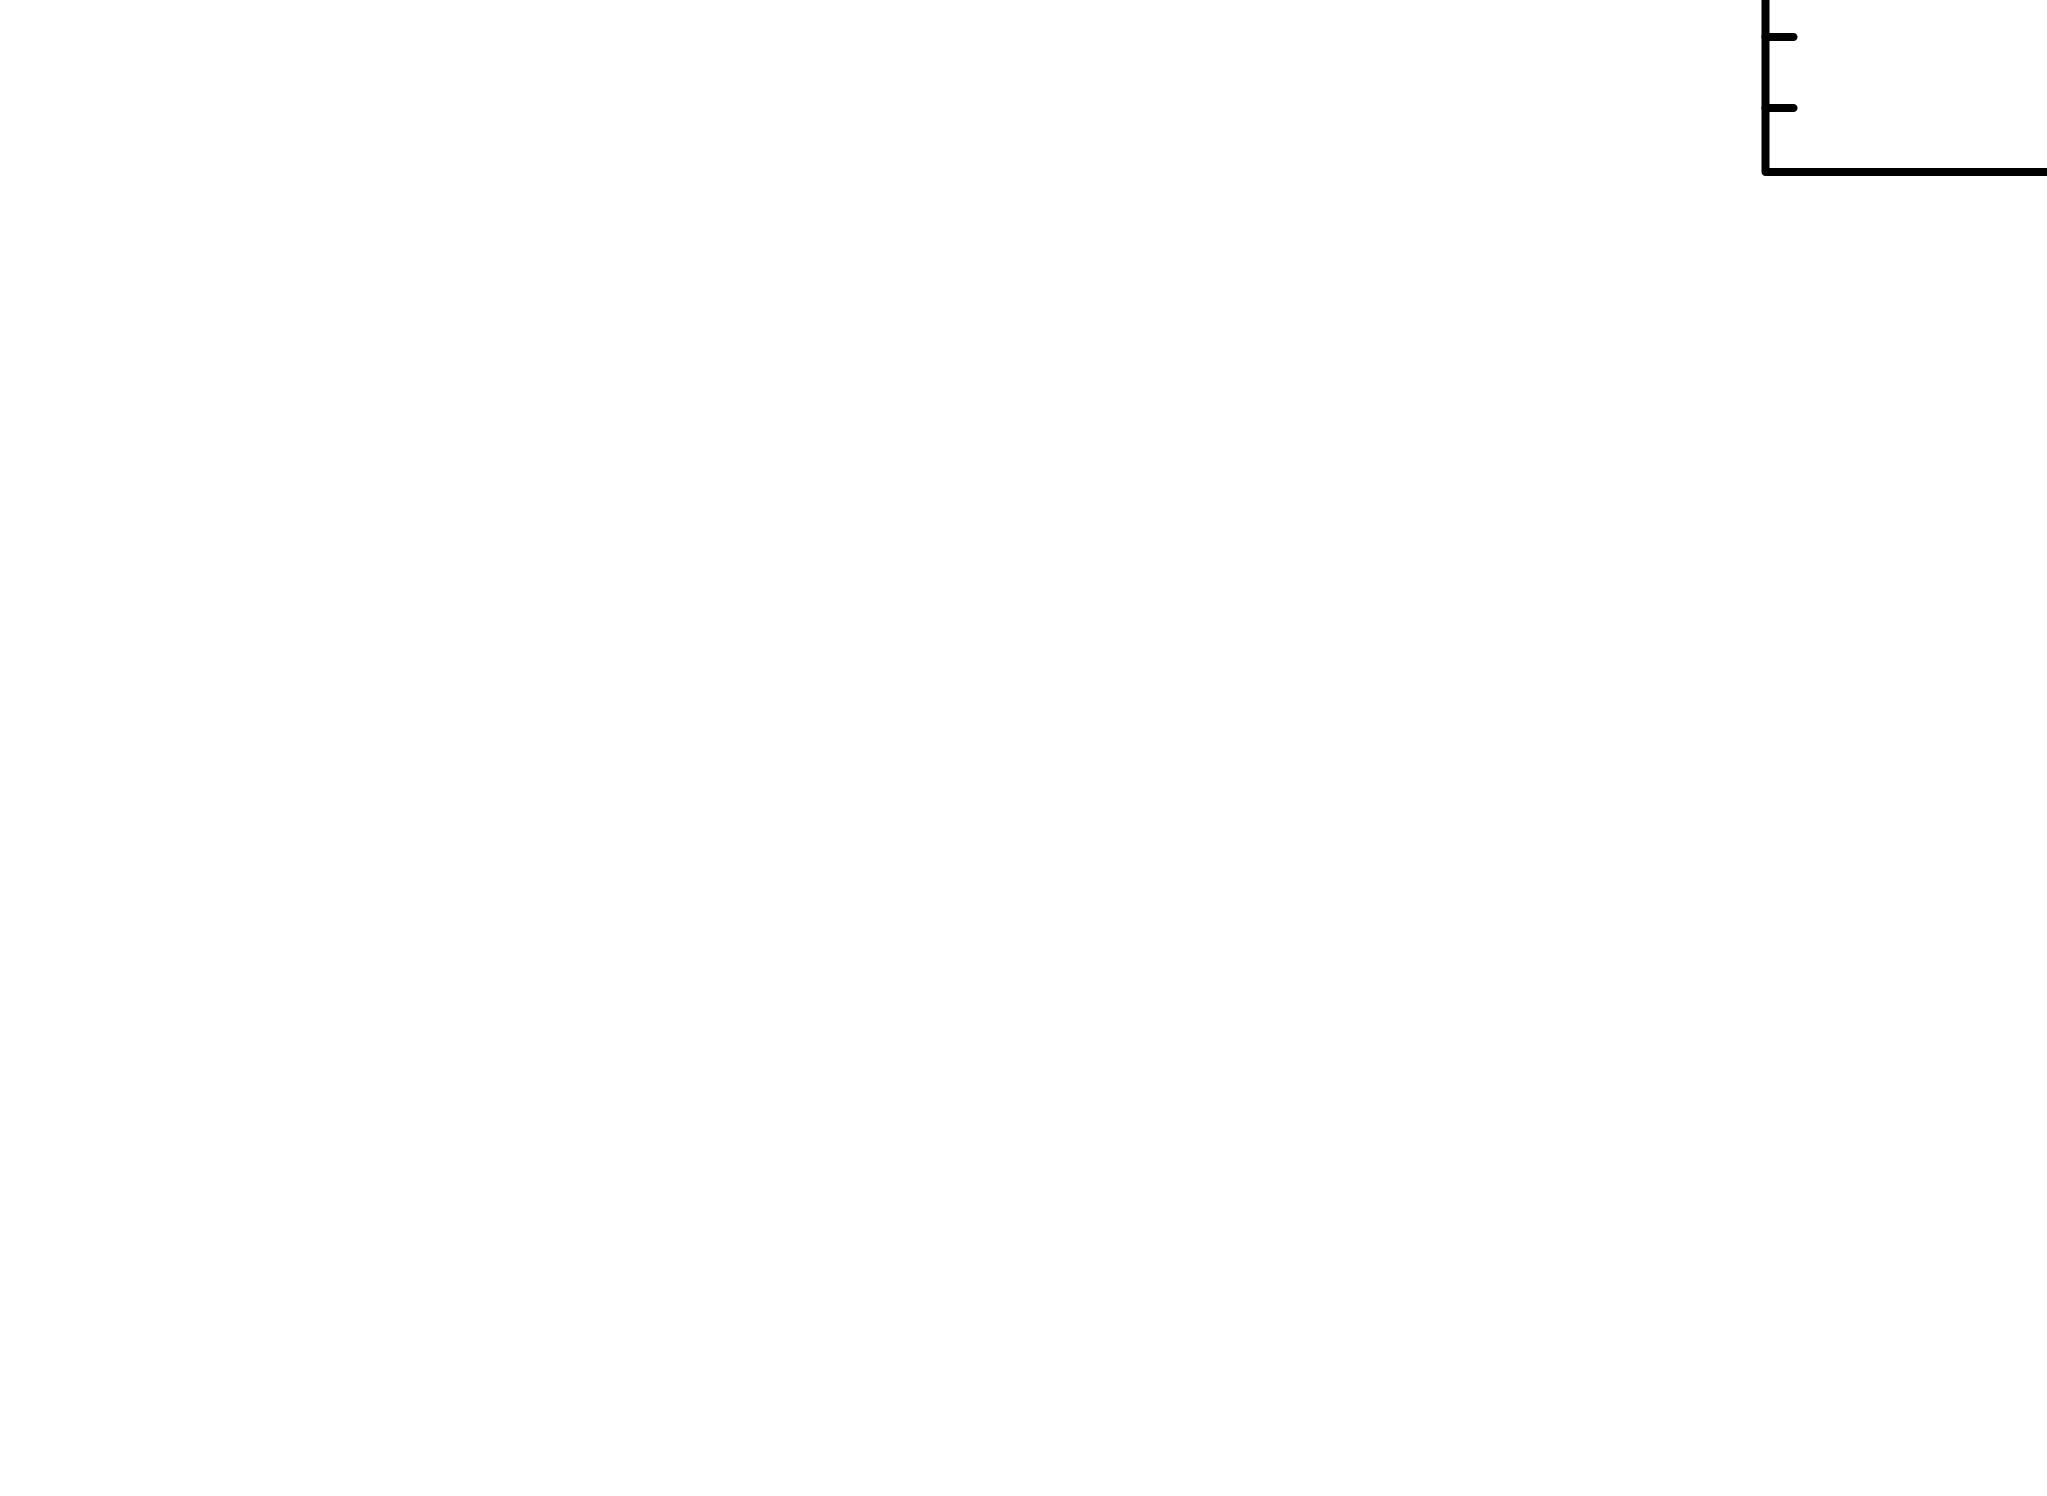

obability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
9.32143      1.15519      -3      0.291733       4.98583   5.93969e-05
3.28259      29865.2      -4       2.16235       18.0257   0.000136844
0.164803     13910.3      -5       1.54841       8.17934   0.000185605
0.000461541  1019.26      -6       1.81942       9.16850   0.000193316
7.71407e-06  17.7346      -7       1.85365       8.93400   0.000195382
1.53157e-13  20.6742      -8       1.85357       8.95329   0.000195419
 Variances and Principal Axes
                 1        2        5  
 1.4639E-09| -0.0000   0.0000   1.0000  
 9.0367E-01|  0.9976   0.0695   0.0000  
 1.1829E+03| -0.0695   0.9976  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   6.610e+00  -8.193e+01   5.314e-04
  -8.193e+01   1.177e+03  -7.007e-03
   5.314e-04  -7.007e-03   4.527e-08
-------

GammQ: A <=  0
GammQ: A <=  0
GammQ: A <=  0


In [13]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.Abundanc=0.3
Fit.perform()
Plot("data resid")